In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
raw = pd.read_csv("ganedago_noagg.csv")
raw

,name,slottime_GMT,pointTitle,value
0,GanedagoHall.Elec.PowerScout3037/kW,2023-03-07 15:00:00,Building Electric,56.3
1,GanedagoHall.Solar.Elec.PowerScout3037/kW,2023-03-07 15:00:00,Solar Generation meter,62.4
2,GanedagoHall.Elec.PowerScout3037/kW,2023-03-07 15:15:00,Building Electric,45.6
3,GanedagoHall.Solar.Elec.PowerScout3037/kW,2023-03-07 15:15:00,Solar Generation meter,64.6
4,GanedagoHall.Elec.PowerScout3037/kW,2023-03-07 15:30:00,Building Electric,39.4
...,...,...,...,...
5186,GanedagoHall.Solar.Elec.PowerScout3037/kW,2023-04-03 15:15:00,Solar Generation meter,150.4
5187,GanedagoHall.Elec.PowerScout3037/kW,2023-04-03 15:30:00,Building Electric,74.3
5188,GanedagoHall.Solar.Elec.PowerScout3037/kW,2023-04-03 15:30:00,Solar Generation meter,150.4
5189,GanedagoHall.Elec.PowerScout3037/kW,2023-04-03 15:45:00,Building Electric,63.9


In [49]:
grid = raw[["slottime_GMT", "value"]][raw["pointTitle"] == "Building Electric"]
grid.columns = ["time", "grid"]
grid = grid.set_index("time")
display(grid)

solar = raw[["slottime_GMT", "value"]][raw["pointTitle"] == "Solar Generation meter"]
solar.columns = ["time", "solar"]
solar = solar.set_index("time")
display(solar)

,grid
time,
2023-03-07 15:00:00,56.3
2023-03-07 15:15:00,45.6
2023-03-07 15:30:00,39.4
2023-03-07 15:45:00,38.0
2023-03-07 16:00:00,21.5
...,...
2023-04-03 14:45:00,45.0
2023-04-03 15:00:00,65.3
2023-04-03 15:15:00,70.5


,solar
time,
2023-03-07 15:00:00,62.4
2023-03-07 15:15:00,64.6
2023-03-07 15:30:00,56.3
2023-03-07 15:45:00,60.9
2023-03-07 16:00:00,84.0
...,...
2023-04-03 14:45:00,136.9
2023-04-03 15:00:00,165.9
2023-04-03 15:15:00,150.4


In [61]:
df = grid.join(solar, on="time", how="inner").reset_index()
# df = pd.concat([grid, solar], axis=1, join="inner").reset_index()
df.to_csv("ganedago_noagg_processed.csv")
df

,time,grid,solar
0,2023-03-07 15:00:00,56.3,62.4
1,2023-03-07 15:15:00,45.6,64.6
2,2023-03-07 15:30:00,39.4,56.3
3,2023-03-07 15:45:00,38.0,60.9
4,2023-03-07 16:00:00,21.5,84.0
...,...,...,...
2590,2023-04-03 14:45:00,45.0,136.9
2591,2023-04-03 15:00:00,65.3,165.9
2592,2023-04-03 15:15:00,70.5,150.4
2593,2023-04-03 15:30:00,74.3,150.4


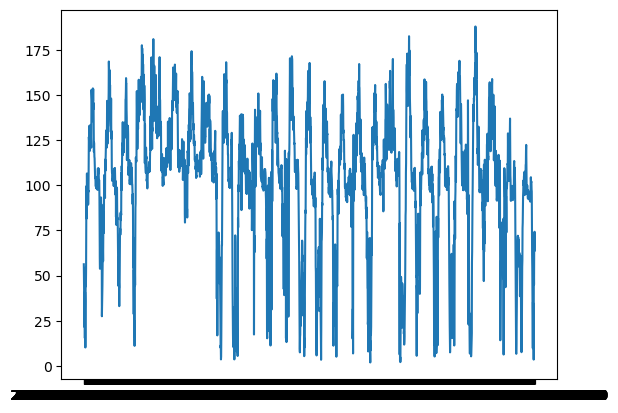

In [60]:
plt.plot(df["time"], df["grid"])